# Prehľadávanie mriežky
Ako nájsť optimálne nastavenie klasifikátoru pri predikcii. V prípade napríklad [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): 
- Ako zistiť optimálny počet susedov?
- Ako zistiť, ktorú dištančnú metriku použiť.

Niektoré algoritmi môžu mať až desiatky parametrov na preskúmanie. Ako zistíme, ktoré máme použiť?

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



# Grid search
[Dokumentácia](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [4]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param_dict = { 
    "n_neighbors": list(range(2,30,1)),
    "p": [1,2,3]    
}

grid = GridSearchCV(model, param_dict, cv=3, verbose=3, n_jobs=-1)
# pozor -1 môže spôsobiť problémy s ramkou pozri parameter pre_dispatch
grid_finished = grid.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [5]:
len(list(range(2,30,1)))

28

In [6]:
grid_finished.cv_results_

{'mean_fit_time': array([0.02099331, 0.01506162, 0.01549967, 0.01548449, 0.01316833,
        0.01683283, 0.0128332 , 0.01200024, 0.01379832, 0.01268832,
        0.01325695, 0.0124898 , 0.01460775, 0.01316635, 0.01349489,
        0.01419799, 0.01516636, 0.01433071, 0.01398698, 0.01445405,
        0.01448679, 0.01478473, 0.01483369, 0.01385466, 0.01471448,
        0.01483385, 0.01433341, 0.01366798, 0.01426323, 0.01377694,
        0.01564431, 0.01499931, 0.01466608, 0.01348233, 0.01458216,
        0.01533278, 0.01474023, 0.01394447, 0.01449982, 0.01500074,
        0.01459074, 0.01480683, 0.01483353, 0.01983285, 0.01483258,
        0.01860285, 0.01556985, 0.01586342, 0.01483369, 0.01950034,
        0.0161922 , 0.01664392, 0.01624314, 0.01680787, 0.01533326,
        0.01731459, 0.02149971, 0.01532356, 0.01718346, 0.01849731,
        0.01533286, 0.01583346, 0.0148325 , 0.0148011 , 0.01449958,
        0.01470391, 0.01484537, 0.0144999 , 0.01698852, 0.01535614,
        0.01483266, 0.01486429,

In [7]:
grid_finished.best_estimator_

KNeighborsClassifier(n_neighbors=2, p=3)

In [8]:
best_knn = grid_finished.best_estimator_
# neigh.fit(X_train, y_train) 
y_pred = best_knn.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9600912200684151
0.9778481012658228
0.8565573770491803
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       755
           1       1.00      0.71      0.83       122

    accuracy                           0.96       877
   macro avg       0.98      0.86      0.90       877
weighted avg       0.96      0.96      0.96       877



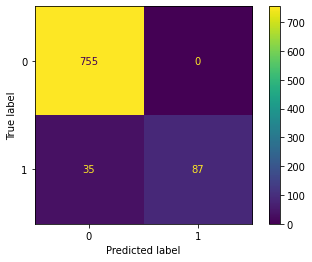

In [9]:
plot_confusion_matrix(best_knn, X_test, y_test)